<h1><center>Projet IA : <br/> Prédiction prix de voiture d'occasion <br/> Régression</center></h1>

# Introduction
[Lien du dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data?select=vehicles.csv)
### Objectif :
Prédire le prix d'une voiture d'occasion en fonction de plusieurs paramètres (année, manufactureur, model, condition, type carburant, kilométrage, transmission, couleur)
### Technologies : 
- Pandas
- Numpy
- Matplotlib
- Sklearn

### Problème rencontré : 
- Score de prédiction faible -> Plus on donnait de données à notre modèle, moins il était performant
### Solution trouvée :
- Nettoyer le dataset
    - Supprimer les entrées qui contiennent des caractéristiques nulles
    - Supprimer les entrées qui contiennent des valeurs abérrantes (exemple : prix à 5€ avec état neuf)
- Tester différents modèles
    - Régression linéaire
    - Régression polynomiale
    - Arbre de décision
    - Forêt d'arbres décisionnel
### Améliorations possible : 
- Nettoyer encore plus le dataset
    - Beaucoup de voiture avec très peu de km (1, 2, 3...)
    - Enlever tous les doublons
    - Détecter et supprimer toutes les valeurs abérrantes (exemple : Lamborghini à 10000€)
    - Factoriser les mêmes modèles de voiture sous un même modèle (exemple : Toyota Prius V, Toyota Prius 5, Toyota V Prius etc... = Toyota Prius V)
- Tester d'autre modèles qu'on ne connait pas pour l'instant

    
---


<div class="alert alert-info">
    <b>Chargement du dataset</b><br>
    On utilise pandas pour récupérer notre dataset sous format csv.
</div>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("output.csv")
print(data.keys())
np.random.seed(1234)

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'fuel',
       'odometer', 'transmission', 'paint_color'],
      dtype='object')


<div class="alert alert-info">
    Après avoir fait notre nettoyage, il nous reste 105521 entrées et 9 caractéristiques par entrée.
</div>

In [26]:
print(data.shape)

(105521, 9)


<div class="alert alert-info">
    <b>Convertion String en valeur numérique</b><br>
    Pour fonctionner, les différents modèles utilisent uniquement des valeurs numériques.
    De ce fait, nous convertissons toute nos caractéristiques String en caractéristiques numérique.
    Et, nous exportons un fichier json qui contient tout les couples de numérique:String.
</div>

In [27]:
import matplotlib.pyplot as plt


mappings = {};

mappings['manufacturer'] = pd.factorize(data.loc[:, 'manufacturer'])[1].tolist()
data.loc[:, 'manufacturer'] = pd.factorize(data.loc[:, 'manufacturer'])[0]

mappings['model'] = pd.factorize(data.loc[:, 'model'])[1].tolist()
data.loc[:, 'model'] = pd.factorize(data.loc[:, 'model'])[0]

mappings['condition'] = pd.factorize(data.loc[:, 'condition'])[1].tolist()
data.loc[:, 'condition'] = pd.factorize(data.loc[:, 'condition'])[0]

mappings['fuel'] = pd.factorize(data.loc[:, 'fuel'])[1].tolist()
data.loc[:, 'fuel'] = pd.factorize(data.loc[:, 'fuel'])[0]

mappings['transmission'] = pd.factorize(data.loc[:, 'transmission'])[1].tolist()
data.loc[:, 'transmission'] = pd.factorize(data.loc[:, 'transmission'])[0]

mappings['paint_color'] = pd.factorize(data.loc[:, 'paint_color'])[1].tolist()
data.loc[:, 'paint_color'] = pd.factorize(data.loc[:, 'paint_color'])[0]

#import json

# Convert the dictionary to a JSON object
#json_obj = json.dumps(mappings)

# Write the JSON object to a file
#with open('mapping2.json', 'w') as f:
#    f.write(json_obj)

/tmp/ipykernel_205448/4169555937.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'manufacturer'] = pd.factorize(data.loc[:, 'manufacturer'])[0]
/tmp/ipykernel_205448/4169555937.py:10: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'model'] = pd.factorize(data.loc[:, 'model'])[0]
/tmp/ipykernel_205448/4169555937.py:13: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` 

<div class="alert alert-info">
    <b>Régression linéaire</b><br>
    Ici nous utilisons une régression linéaire, on obtient une précision d'environ 0.33.
</div>

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error

columns = ['year', 'manufacturer','model', 'condition', 'fuel', 'odometer', 'transmission', 'paint_color']

# Etape 1 : Séparer les données en données d'entrainement et de test (80% entrainement, 20% test)
X = data[columns]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Etape 2 : Création d'une instance de LinearRegression et entrainement du modèle
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Etape 3 : Utiliser la fonction de prédiction pour faire une prédiction sur les données test
y_pred = lin_reg.predict(X_test)

print("R^2 score:", r2_score(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))


R^2 score: 0.33827235097603925
MSE : 104537573.77256422
Mean Absolute Error:  6778.827483286947


In [51]:
# Ford Mustang 2018
# Create a new input dataset
new_data = pd.DataFrame({'year': [2018], 'manufacturer': [3], 'model': [5], 'condition': [0], 'fuel': [1], 'odometer': [36000], 'transmission': [0], 'paint_color': [0]})

# Make a prediction on the new dataset
predicted_price = lin_reg.predict(new_data)

# Print the predicted price
print("Predicted price:", predicted_price)

Predicted price: [19860.32929872]


<div class="alert alert-info">
    <b>Régression polynomiale</b><br>
    Ici nous utilisons une régression polynomiale, on obtient une précision d'environ 0.45.
</div>

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

columns = ['year', 'manufacturer','model', 'condition', 'fuel', 'odometer', 'transmission', 'paint_color']

# Etape 1 : Séparer les données en données d'entrainement et de test (80% entrainement, 20% test)
X = data[columns]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Etape 2 : Création d'une instance de PolynomialFeatures et entrainement du modèle
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

# Etape 3 : Utiliser la fonction de prédiction pour faire une prédiction sur les données test
X_test_poly = poly_reg.transform(X_test)
y_pred = lin_reg_2.predict(X_test_poly)

print("R^2 score:", r2_score(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

R^2 score: 0.4476555043004936
MSE : 89531375.68576483
Mean Absolute Error:  5815.988536554693


In [52]:
# Ford Mustang 2018
# Create a new input dataset
new_data = pd.DataFrame({'year': [2018], 'manufacturer': [3], 'model': [5], 'condition': [0], 'fuel': [1], 'odometer': [36000], 'transmission': [0], 'paint_color': [0]})

# Make a prediction on the new dataset
X_test_poly = poly_reg.transform(new_data)
predicted_price = lin_reg_2.predict(X_test_poly)

# Print the predicted price
print("Predicted price:", predicted_price)

Predicted price: [21730.64052047]


<div class="alert alert-info">
    <b>Forêt d'arbres décisionnel</b><br>
    Ici nous utilisons un modèle de forêt d'arbres décisionnel, on obtient une précision d'environ 0.71.
    Avec ce modèle, nous observons que les caractéristiques avec le plus d'influence sont : 
    <br/>
    - L'année
    <br/>
    - Le kilométrage
</div>

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error

columns = ['year', 'manufacturer','model', 'condition', 'fuel', 'odometer', 'transmission', 'paint_color']

from sklearn.ensemble import RandomForestRegressor

# Etape 1 : Séparer les données en données d'entrainement et de test (80% entrainement, 20% test)
X = data[columns]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Etape 2 : Création d'une instance de RandomForestRegressor et entrainement du modèle
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)

# Etape 3 : Utiliser la fonction de prédiction pour faire une prédiction sur les données test
y_pred = rf_reg.predict(X_test)
print("feature importances :",rf_reg.feature_importances_)

# Step 4: Evaluate the model performance
print("R^2 score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))


feature importances : [0.40542849 0.12028628 0.14334753 0.03660492 0.06725282 0.17417377
 0.01365785 0.03924833]
R^2 score:  0.709975280131408
Mean Squared Error:  44094685.05488372
Mean Absolute Error:  3822.480193179912


In [54]:
# Ford Mustang 2018
# Create a new input dataset
new_data = pd.DataFrame({'year': [2018], 'manufacturer': [3], 'model': [5], 'condition': [0], 'fuel': [1], 'odometer': [36000], 'transmission': [0], 'paint_color': [0]})

# Make a prediction on the new dataset
predicted_price = rf_reg.predict(new_data)

# Print the predicted price
print("Predicted price:", predicted_price)

Predicted price: [38993.9]


<div class="alert alert-info">
    <b>Arbre de décision</b><br>
    Ici nous utilisons un modèle d'arbre de décision, on obtient une précision d'environ 0.44.
</div>

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

columns = ['year', 'manufacturer','model', 'condition', 'fuel', 'odometer', 'transmission', 'paint_color']

# Etape 1 : Séparer les données en données d'entrainement et de test (80% entrainement, 20% test)
X = data[columns]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Etape 2 : Création d'une instance de DecisionTreeRegressor et entrainement du modèle
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train, y_train)

# Etape 3 : Utiliser la fonction de prédiction pour faire une prédiction sur les données test
y_pred = dt_reg.predict(X_test)

print("R^2 score:", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

R^2 score: 0.45342760524932124
Mean Absolute Error:  4934.525001974255


In [62]:
# Ford Mustang 2018
# Create a new input dataset
new_data = pd.DataFrame({'year': [2018], 'manufacturer': [3], 'model': [5], 'condition': [0], 'fuel': [1], 'odometer': [36000], 'transmission': [0], 'paint_color': [0]})

# Make a prediction on the new dataset
predicted_price = dt_reg.predict(new_data)

# Print the predicted price
print("Predicted price:", predicted_price)

Predicted price: [32900.]


<div class="alert alert-info">
    <b>D'autres tests</b><br>
     En utilisant le modèle de forêt d'arbres décisionnel
</div>

In [66]:
# Jeep Compass 2018
# Create a new input dataset
new_data = pd.DataFrame({'year': [2018], 'manufacturer': [6], 'model': [1657], 'condition': [1], 'fuel': [1], 'odometer': [51700], 'transmission': [0], 'paint_color': [6]})

# Make a prediction on the new dataset
predicted_price = rf_reg.predict(new_data)

# Print the predicted price
print("Predicted price:", predicted_price)

Predicted price: [24489.4]


In [67]:
# Mercedes Benz 2014
# Create a new input dataset
new_data = pd.DataFrame({'year': [2014], 'manufacturer': [7], 'model': [454], 'condition': [1], 'fuel': [1], 'odometer': [50000], 'transmission': [0], 'paint_color': [6]})

# Make a prediction on the new dataset
predicted_price = rf_reg.predict(new_data)

# Print the predicted price
print("Predicted price:", predicted_price)

Predicted price: [19904.87]


In [68]:
# Toyota Prius v 2014
# Create a new input dataset
new_data = pd.DataFrame({'year': [2014], 'manufacturer': [16], 'model': [11321], 'condition': [1], 'fuel': [1], 'odometer': [25000], 'transmission': [0], 'paint_color': [3]})

# Make a prediction on the new dataset
predicted_price = rf_reg.predict(new_data)

# Print the predicted price
print("Predicted price:", predicted_price)

Predicted price: [18563.79]


<div class="alert alert-info">
    <b>Graphique</b><br>
    Affichage des prédictions en fonction des valeurs réelles
</div>

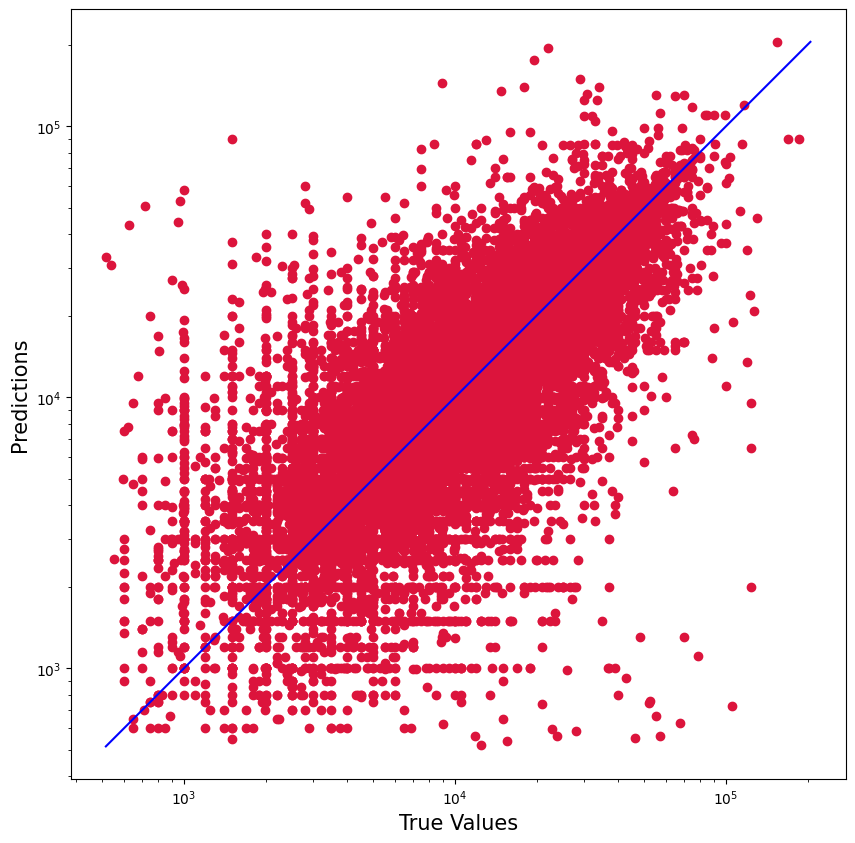

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()